/tmp/ipykernel_250705/2103844632.py:66: RuntimeWarning: overflow encountered in scalar power
  sigma[t] = z[t] * (omega[states[t]] + alpha[states[t]] * x[t-1] ** 2 + beta[states[t]] * z[t-1] ** 2) ** 0.5
/tmp/ipykernel_250705/2103844632.py:66: RuntimeWarning: invalid value encountered in scalar multiply
  sigma[t] = z[t] * (omega[states[t]] + alpha[states[t]] * x[t-1] ** 2 + beta[states[t]] * z[t-1] ** 2) ** 0.5


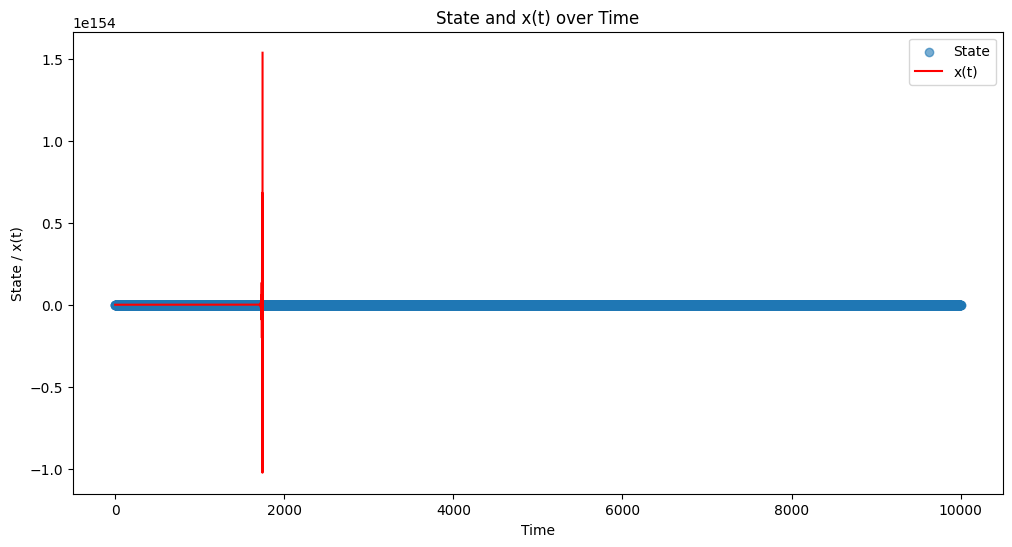

{'phi': [-1.5, 1],
 'mu': [0, 0],
 'omega': [1, 1],
 'alpha': [0, 0],
 'beta': [0, 0],
 'p11': 0.05,
 'p22': 0.05}

In [1]:
# Revised code to correctly handle the state transitions and use different parameters for each state

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
# Set the random seed for reproducibility
# np.random.seed(0)

num_obs = 10000

# Generating two sets of parameters for each state
phi = np.random.uniform(-1, 1, size=2)  # Two values of phi in [-1, 1]
mu = np.random.uniform(-1, 1, size=2)  # Two values of mu in [-1, 1]
omega = np.random.uniform(0.01, 1, size=2)  # Two values of omega in [0.01, 1]
alpha = np.random.uniform(0.01, 1, size=2)  # Two values of alpha in [0.01, 1]
beta = np.array(np.absolute([np.random.uniform(0.01, 1 - 0.5*alpha[i]- 0.5*phi[i]) for i in range(2)]))  # Two values of beta
df = np.random.randint(15, 150, size=2)  # Two values for degrees of freedom
nu = np.random.uniform(0, 5, size=2)  # Two values for variance

# Transition probabilities for the Markov Switching
p11 = np.random.uniform(0, 1)  # Transition probability from state 1 to state 1
p22 = np.random.uniform(0, 1)  # Transition probability from state 2 to state 2

# Custom defining variables for testing
# Generating two sets of parameters for each state
phi = [-0.35,0.6]
mu = [-0.1,0.4]
omega = [0.1,0.4]
alpha = [0.1,0.15]
beta = [0.6,0.75]
df = [16,32]  # Two values for degrees of freedom
nu = [0.8,3.2]  # Two values for variance


phi = [-1.5,1]
mu = [0,0]
omega = [1,1]
alpha = [0,0]
beta = [0,0]
df = [16,32] 
# Transition probabilities for the Markov Switching
p11 = 0.05  # Transition probability from state 1 to state 1
p22 = 0.05  # Transition probability from state 2 to state 2
# Initialize the arrays



x = np.zeros(num_obs)
sigma = np.zeros(num_obs)
states = np.zeros(num_obs, dtype=int)
z = np.zeros(num_obs)

# Generate observations and states
for t in range(1, num_obs):
    # Determine the state transition
    if states[t-1] == 0:
        states[t] = 0 if np.random.rand() < p11 else 1
    else:
        states[t] = 1 if np.random.rand() < p22 else 0

    # t-distributed noise with specified df and variance for each state
    # z[t] = np.random.standard_t(df[states[t]]) * np.sqrt(nu[states[t]])
    z[t] = np.random.normal(0,1)
    # Calculate sigma and x using the state-dependent parameters
    sigma[t] = z[t] * (omega[states[t]] + alpha[states[t]] * x[t-1] ** 2 + beta[states[t]] * z[t-1] ** 2) ** 0.5
    x[t] = mu[states[t]] + phi[states[t]] * x[t-1] + sigma[t]

# Store results in a DataFrame
data = pd.DataFrame({
    'Time': range(num_obs),
    'x': x,
    'sigma': sigma,
    'z': z,
    'State': states
})

# Scatterplot with state on the y-axis and time on the x-axis
plt.figure(figsize=(12, 6))
plt.scatter(data['Time'], data['State'], alpha=0.6, label='State')
plt.plot(data['Time'], data['x'], color='red', label='x(t)')
plt.xlabel('Time')
plt.ylabel('State / x(t)')
plt.title('State and x(t) over Time')
plt.legend()
plt.show()

# Print the parameters
true_parameters = {
    'phi': phi,
    'mu': mu,
    'omega': omega,
    'alpha': alpha,
    'beta': beta,
    #'df': df,
    #'nu': nu,
    'p11': p11,
    'p22': p22
}
true_parameters